In [1]:
!pip install ndjson altair

In [2]:
import ndjson
import altair as alt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

workingdir = "/content/drive/MyDrive/Manning - Liveprojects/Sentiment Analysis/dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# load raw data
def importjson(fname):
  with open(fname) as f:
    data = ndjson.load(f)
  return data

inputfname = f"{workingdir}/Video_Games_5.json"
data = importjson(inputfname)

Keep only columns of interest and drop rows if no values

In [13]:
# convert data into a pandas dataframe for further processing
vidgamesdf = pd.DataFrame(data)
df = vidgamesdf[["overall", "reviewText"]]
df.rename(columns={"overall": "ratings", "reviewText": "reviews"}, inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
df.head()

,ratings,reviews
0,5.0,"This game is a bit hard to get the hang of, bu..."
1,4.0,I played it a while but it was alright. The st...
2,3.0,ok game.
3,2.0,"found the game a bit too complicated, not what..."
4,5.0,"great game, I love it and have played it since..."


Plot the distribution of the overall column

In [19]:
def plot(dataframe):
  # Distribution plot with altair takes alot of time...
  # alt.data_transformers.disable_max_rows()
  # alt.Chart(df).mark_bar().encode(
  #     x=alt.X('overall', bin=True),
  #     y='count()'
  # )

  # Seaborn Distplot
  # sns.displot(dataframe, x="ratings", discrete=True)
  # Seaborn Histplot
  # sns.histplot(dataframe, x="ratings", discrete=True)
  # Matplotlib histplot
  plt.hist(dataframe['ratings'], bins=5, edgecolor='black')

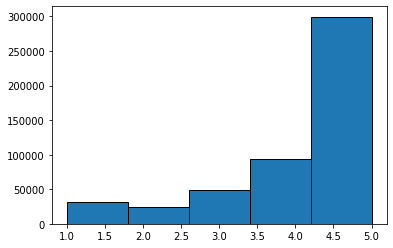

In [20]:
plot(df)

Create a smaller balanced corpus

In [22]:
rus = RandomUnderSampler(
    sampling_strategy={1.0: 1500, 2.0: 500, 3.0: 500, 4.0: 500, 5.0: 1500},
    random_state=42,
    return_indices=True
)
X_reviewText, y_overall, id_rus = rus.fit_sample(df[['reviews']], df[['ratings']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# both are the same
print (X_reviewText[0])
print (df.iloc[id_rus[0]])

["Made in china... either a single bad luck of the draw or not the old Red Octane quality.  :(  Assume i'm either stuck paying shipping on this large item somewhere to try and claim some warranty for it.  Might be better to buy it in person somewhere that will stand behind an in person warranty exchange after 30 days if there are still places that do."]
ratings                                                    1
reviews    Made in china... either a single bad luck of t...
Name: 89111, dtype: object


Create a new dataframe, plot it to check and export it for other assignments

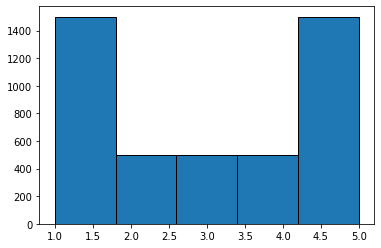

In [32]:
small_corpus_df = pd.DataFrame({"ratings": y_overall.transpose()[0], "reviews": X_reviewText.transpose()[0]})
plot (small_corpus_df)



```
# This is formatted as code
```

### Export to json and csv

In [31]:
def exportjson(dataframe, fname):
  with open(fname, "w") as outfile:
    outfile.write(dataframe.to_json( orient='records', lines=True))

In [61]:
def exportcsv(dataframe, fname):
  dataframe.replace('\n','', regex=True, inplace=True)
  with open(fname, "w") as outfile:
    outfile.write(dataframe.to_csv( index=False, sep="\t", encoding="utf-8"))

In [62]:
export_small_corpus_json = f"{workingdir}/small_corpus.json"
exportjson(small_corpus_df, export_small_corpus_json)

export_small_corpus_csv = f"{workingdir}/small_corpus.csv"
exportcsv(small_corpus_df, export_small_corpus_csv)

Check if import results in the same plot

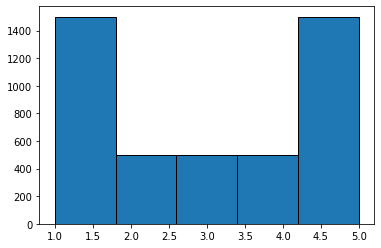

In [42]:
def import_and_plot(fname):
  data = importjson(fname)
  plot(pd.DataFrame(data))

import_and_plot(export_small_corpus_json_fname)

### Large corpus (with resampler)

In [46]:
rus = RandomUnderSampler(
    sampling_strategy={1.0: 20000, 2.0: 20000, 3.0: 20000, 4.0: 20000, 5.0: 20000},
    random_state=42,
    return_indices=True
)
X_reviewText, y_overall, id_rus = rus.fit_sample(df[['reviews']], df[['ratings']])
big_corpus_df = pd.DataFrame({"ratings": y_overall.transpose()[0], "reviews": X_reviewText.transpose()[0]})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


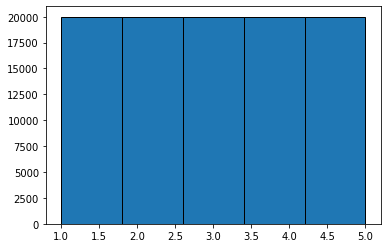

In [47]:
plot(big_corpus_df)

In [48]:
export_big_corpus_json_fname = f"{workingdir}/big_corpus.json"
exportjson(big_corpus_df, export_big_corpus_json_fname)

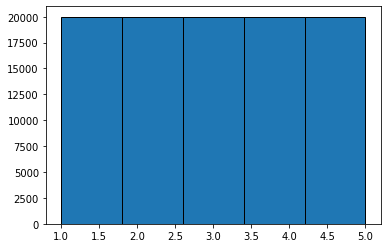

In [49]:
import_and_plot(export_big_corpus_json_fname)

### Large corpus with numpy.random.randint

In [50]:
import numpy as np
r = np.random.randint(len(df), size=100000)
big_corpus_df2 = df.iloc[r]

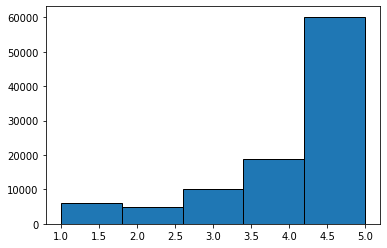

In [51]:
plot(big_corpus_df2)

In [52]:
big_corpus_df2

,ratings,reviews
206872,5.0,"I love this item, i played on a psp 2000 for a..."
59411,4.0,"I liked it, but I never really played much of ..."
397415,5.0,son loves it
112503,4.0,I got this game on Christmas and sat down to p...
100686,1.0,Sounds like a lot of other people have had goo...
...,...,...
321592,5.0,This is a simple cable that does exactly what ...
124407,5.0,its great
496727,5.0,5 stars for the sun
287539,5.0,love it more than symphonia very fun and quirk...


In [63]:
export_big_corpus_json_fname2 = f"{workingdir}/big_corpus2.json"
exportjson(big_corpus_df2, export_big_corpus_json_fname2)

export_big_corpus_csv = f"{workingdir}/big_corpus.csv"
exportcsv(big_corpus_df2, export_big_corpus_csv)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


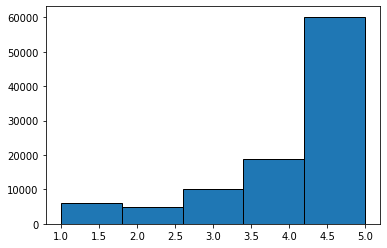

In [54]:
import_and_plot(export_big_corpus_json_fname2)